# Analysis Retail Sales Data
`ahmadfurqan7`

In [70]:
# Import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Exploration

In [31]:
# Load dataset
df = pd.read_csv('retail_sales_dataset.csv')

In [32]:
# Check row and column
df.shape

(1000, 9)

In [33]:
# Top five rows and bottom five rows
pd.concat([df.head(), df.tail()])

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150
999,1000,2023-04-12,CUST1000,Male,47,Electronics,4,30,120


In [35]:
# Info about dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [36]:
# Column convert to lowercase format and space replace with (_)
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [37]:
# Check column name
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   transaction_id    1000 non-null   int64 
 1   date              1000 non-null   object
 2   customer_id       1000 non-null   object
 3   gender            1000 non-null   object
 4   age               1000 non-null   int64 
 5   product_category  1000 non-null   object
 6   quantity          1000 non-null   int64 
 7   price_per_unit    1000 non-null   int64 
 8   total_amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [38]:
# Summary statistics

df.describe()

,transaction_id,age,quantity,price_per_unit,total_amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


In [39]:
# Check duplicated rows

df.duplicated().sum()

0

### In this dataframe, the date, gender, and product_category columns are incorrectly assigned data types; now, they need to be changed to the correct data types.

In [40]:
# change date data type
df['date'] = pd.to_datetime(df['date'])

In [43]:
# change gender data type
df['gender'] = df['gender'].astype('category')

In [44]:
# change product_category data type
df['product_category'] = df['product_category'].astype('category')

In [45]:
# Check data type
df.dtypes

transaction_id               int64
date                datetime64[ns]
customer_id                 object
gender                    category
age                          int64
product_category          category
quantity                     int64
price_per_unit               int64
total_amount                 int64
dtype: object

In [46]:
# remove transaction_id which is not useful our analysis
df.drop('transaction_id', axis=1, inplace=True)

In [16]:
# copy dataframe
tem_df = df.copy()

# Filter Data

In [48]:
# Check product_category is Beauty
df[(df['product_category']=='Beauty')]

,date,customer_id,gender,age,product_category,quantity,price_per_unit,total_amount
0,2023-11-24,CUST001,Male,34,Beauty,3,50,150
4,2023-05-06,CUST005,Male,30,Beauty,2,50,100
5,2023-04-25,CUST006,Female,45,Beauty,1,30,30
11,2023-10-30,CUST012,Male,35,Beauty,3,25,75
20,2023-01-14,CUST021,Female,50,Beauty,1,500,500
...,...,...,...,...,...,...,...,...
981,2023-12-19,CUST982,Female,46,Beauty,3,30,90
989,2023-05-25,CUST990,Female,58,Beauty,2,500,1000
993,2023-12-18,CUST994,Female,51,Beauty,2,500,1000
996,2023-11-17,CUST997,Male,52,Beauty,3,30,90


In [49]:
# Check customer age > 40
df[(df['age']>40)]

,date,customer_id,gender,age,product_category,quantity,price_per_unit,total_amount
2,2023-01-13,CUST003,Male,50,Electronics,1,30,30
5,2023-04-25,CUST006,Female,45,Beauty,1,30,30
6,2023-03-13,CUST007,Male,46,Clothing,2,25,50
8,2023-12-13,CUST009,Male,63,Electronics,2,300,600
9,2023-10-07,CUST010,Female,52,Clothing,4,50,200
...,...,...,...,...,...,...,...,...
993,2023-12-18,CUST994,Female,51,Beauty,2,500,1000
994,2023-04-30,CUST995,Female,41,Clothing,1,30,30
995,2023-05-16,CUST996,Male,62,Clothing,1,50,50
996,2023-11-17,CUST997,Male,52,Beauty,3,30,90


# Univariate Analysis

In [50]:
# date
df['date'].describe()

count                             1000
mean     2023-07-03 00:25:55.200000256
min                2023-01-01 00:00:00
25%                2023-04-08 00:00:00
50%                2023-06-29 12:00:00
75%                2023-10-04 00:00:00
max                2024-01-01 00:00:00
Name: date, dtype: object

#### Gender 
`conclusions:`

- The retail sales data shows a slight majority of female customers (51%) compared to males (49%), indicating a relatively balanced gender distribution in the customer base.

In [18]:
# Gender column frequency
df['gender'].value_counts()

gender
Female    510
Male      490
Name: count, dtype: int64

<Axes: ylabel='count'>

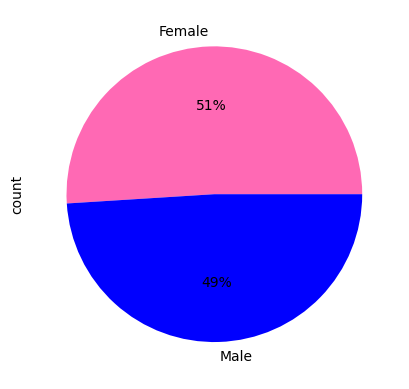

In [19]:
# Pie chart customer gender
df['gender'].value_counts().plot(kind='pie', autopct='%.0f%%',colors=['hotpink','blue'])

#### Product Category
`conclusions:`
- The sales data reveals that clothing, electronics, and beauty products are the top three categories, with clothing leading slightly (351), followed closely by electronics (342), and beauty products (307).

In [20]:
# Frequency of product_category
df['product_category'].value_counts()

product_category
Clothing       351
Electronics    342
Beauty         307
Name: count, dtype: int64

<Axes: xlabel='product_category'>

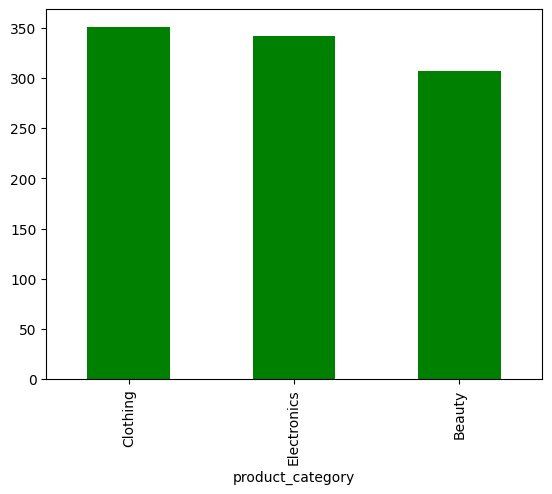

In [22]:
# Barplot product category
df['product_category'].value_counts().plot(kind='bar', color='green')

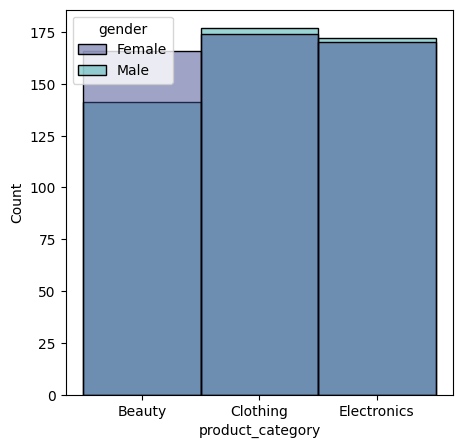

In [61]:
# Frequency of product_category based gender
plt.figure(figsize=(5,5))
sns.histplot(df,x='product_category',hue='gender',palette='mako')
plt.show()

#### Age
`conclusions:`
- The skewness score of -0.0488 suggests a near-symmetrical distribution, which aligns with the appearance of a uniform distribution.
- The age distribution of customers exhibits a very slight negative skew (-0.0488), indicating a slight tendency towards younger ages, though overall it remains relatively symmetrical. With a mean age of 41.39 years and a standard deviation of 13.68, customers range from 18 to 64 years old, with median and quartile values providing insight into the central tendency and dispersion of the data.

In [29]:
# descriptive age stats
df['age'].describe()

count    1000.00000
mean       41.39200
std        13.68143
min        18.00000
25%        29.00000
50%        42.00000
75%        53.00000
max        64.00000
Name: age, dtype: float64

<Axes: ylabel='Frequency'>

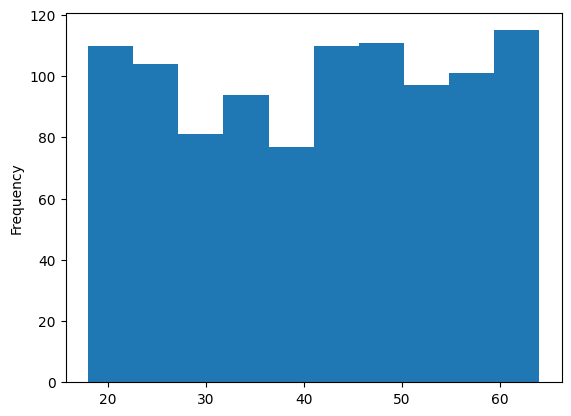

In [33]:
# Age Distribution plot
df['age'].plot(kind='hist')

In [34]:
# Age skew score
tem_df['age'].skew()

-0.04881245380328967

#### Quantity
`conclusions:`
- The quantity distribution indicates a mean purchase quantity of 2.514 with a standard deviation of 1.133. The majority of purchases fall within the range of 1 to 4 items, with 50% of purchases being 3 or fewer items.

In [35]:
# Quantity descriptive stats
df['quantity'].describe()

count    1000.000000
mean        2.514000
std         1.132734
min         1.000000
25%         1.000000
50%         3.000000
75%         4.000000
max         4.000000
Name: quantity, dtype: float64

<Axes: xlabel='quantity'>

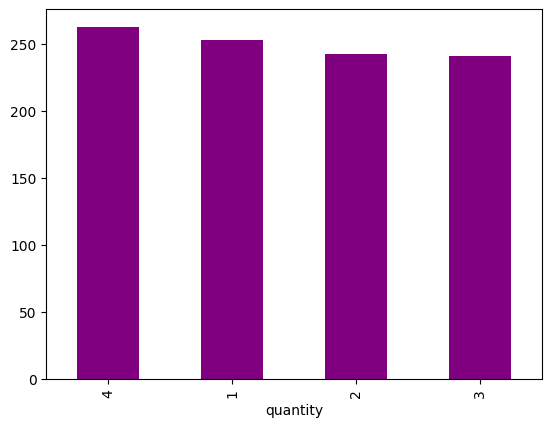

In [24]:
# Quantity Bar Plot
df['quantity'].value_counts().plot(kind='bar',color='purple')

#### Price Per Unit
`conclusions:` 
- The "price_per_unit" column has distinct values at 25, 30, 50, 300, and 500, with corresponding counts of 210, 183, 211, 197, and 199, respectively. The summary statistics show a mean of 179.89, with prices ranging from 25 to 500, and 50% of prices falling between 30 and 300.

In [37]:
# Price per unit descriptive stats
df['price_per_unit'].describe()

count    1000.000000
mean      179.890000
std       189.681356
min        25.000000
25%        30.000000
50%        50.000000
75%       300.000000
max       500.000000
Name: price_per_unit, dtype: float64

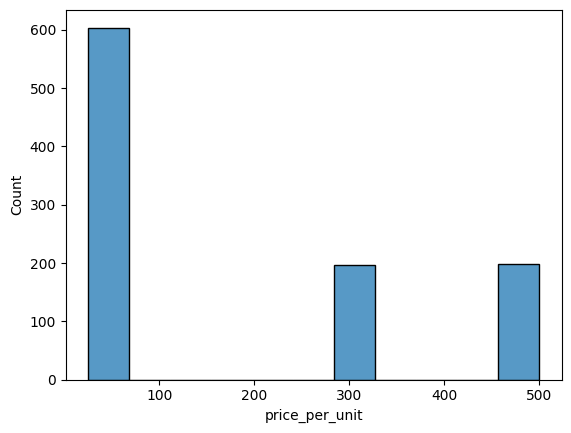

In [25]:
# Price per unit Histogram Plot
sns.histplot(df, x='price_per_unit')
plt.show()

#### Total Amount
`conclusions:`
- The data for the "total_spent" column indicates a mean expenditure of 456, with a standard deviation of 560. Expenditures range from 25 to 2000, with 50% of the values falling between 60 and 900, reflecting diverse spending patterns among customers.

In [39]:
# Total amount descriptive stats
df['total_amount'].describe()

count    1000.000000
mean      456.000000
std       559.997632
min        25.000000
25%        60.000000
50%       135.000000
75%       900.000000
max      2000.000000
Name: total_amount, dtype: float64

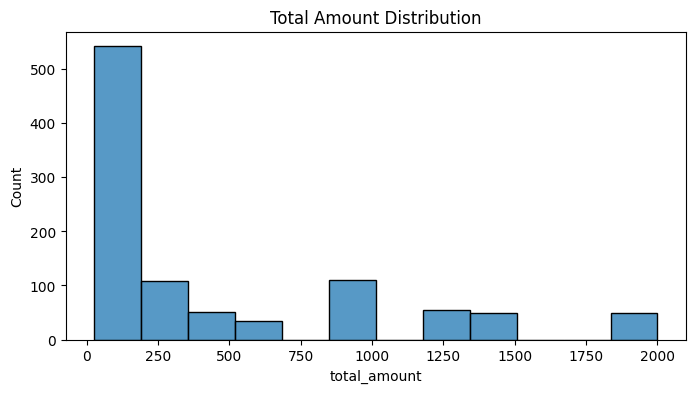

In [42]:
# Total amount Histogram Plot
plt.figure(figsize=(8,4))
sns.histplot(df['total_amount'])
plt.title('Total Amount Distribution')
plt.show()

<Figure size 1000x600 with 0 Axes>

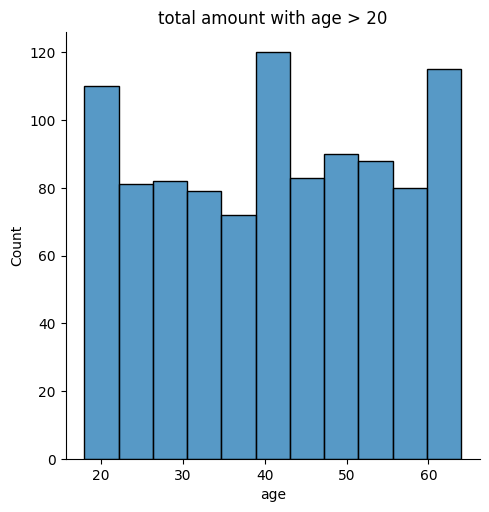

In [69]:
# Filter total amount with age > 20
plt.figure(figsize=(10,6))
sns.displot(df[df['total_amount']>20]['age'])
plt.title('total amount with age > 20')
plt.show()

# Bivariate Analysis

- Numerical vs Numerical

<Axes: xlabel='age', ylabel='total_amount'>

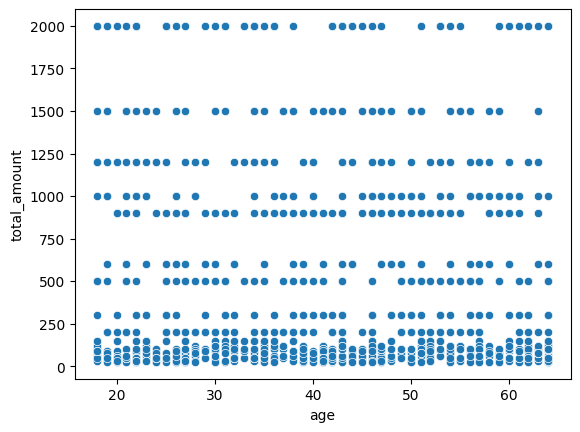

In [43]:
# Scatterplot between age and total_amount
sns.scatterplot(df, x='age', y='total_amount')

In [48]:
# Correlation score age with total amount
df['age'].corr(df['total_amount'])

-0.060568023883045656

- The correlation coefficient between price per unit and total amount spent (0.8519) indicates a strong positive linear relationship. This suggests that as the price per unit increases, the total amount spent tends to increase as well.

<Axes: xlabel='price_per_unit', ylabel='total_amount'>

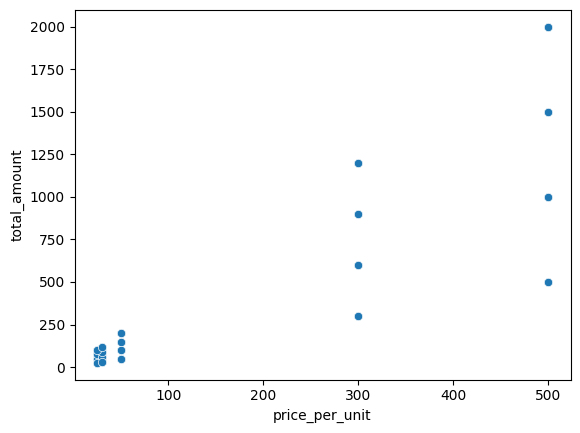

In [46]:
# Scatterplot between price_per_unit and total_amount
sns.scatterplot(df, x='price_per_unit', y='total_amount')

In [47]:
# Correlation score price per unit with total amount
df['price_per_unit'].corr(df['total_amount'])

0.8519248403554038

- The correlation coefficient between quantity and total amount spent (0.3737) suggests a moderate positive linear relationship. This implies that as the quantity of items purchased increases, there tends to be a corresponding increase in the total amount spent, though the relationship is not as strong as with price per unit.

<Axes: xlabel='quantity', ylabel='total_amount'>

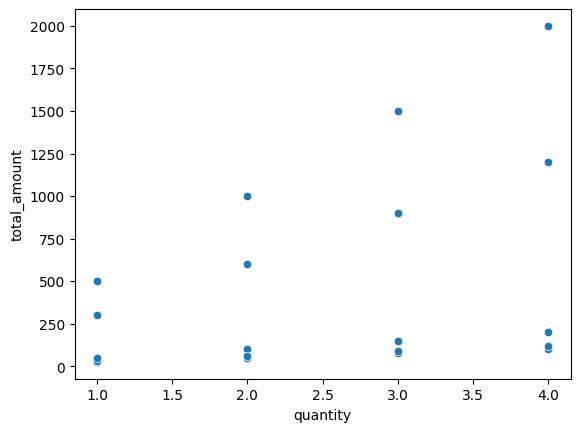

In [51]:
# Scatterplot between quantity and total_amount
sns.scatterplot(df, x='quantity', y='total_amount')

In [50]:
# Correlation score quantity and total amount
df['quantity'].corr(df['total_amount'])

0.37370705412140603

- Categorical vs Categorical

- Females made more purchases in the Clothing category (174) compared to Beauty (166) and Electronics (170), while males made the highest number of purchases in Clothing (177), followed closely by Electronics (172) and Beauty (141). These results suggest differing purchasing preferences between genders, with both groups showing significant interest in Clothing, but males slightly favoring Electronics and females showing slightly higher interest in Beauty products.

In [52]:
# Gender and product category
pd.crosstab(df['gender'], df['product_category'])

product_category,Beauty,Clothing,Electronics
gender,,,
Female,166,174,170
Male,141,177,172


- Both males and females exhibit similar purchasing patterns across different quantities of items. The highest frequency of purchases is for quantities of 4, with females purchasing 138 items and males purchasing 125 items. Quantity 3 follows closely for females with 127 purchases and slightly lower for males with 114 purchases. There's a relatively balanced distribution for quantities 1 and 2 between both genders, indicating similar buying behaviors regardless of quantity.

In [53]:
# Gender and quantity
pd.crosstab(df['gender'], df['quantity'])

quantity,1,2,3,4
gender,,,,
Female,125,120,127,138
Male,128,123,114,125


- Across different product categories, the highest frequency of purchases is observed for a quantity of 4. For Beauty products, there were 73 purchases, for Clothing, 97 purchases, and for Electronics, 93 purchases. This suggests a preference for larger quantities, particularly in Clothing purchases. The quantity distribution is relatively balanced across different categories, indicating consistent buying behaviors regardless of the product type.

In [54]:
# Product_category and quantity
pd.crosstab(df['product_category'], df['quantity'])

quantity,1,2,3,4
product_category,,,,
Beauty,74,75,85,73
Clothing,88,80,86,97
Electronics,91,88,70,93


- both genders exhibit varied purchasing patterns across different price per unit categories. Females show higher purchases in the price ranges of 50 and 300, with 98 and 106 purchases respectively. Meanwhile, males show a slightly higher preference for the price range of 50 with 113 purchases. Additionally, both genders show comparable purchase frequencies in the price ranges of 25 and 500.

In [55]:
# Gender and price_per_unit
pd.crosstab(df['gender'], df['price_per_unit'])

price_per_unit,25,30,50,300,500
gender,,,,,
Female,115,92,98,106,99
Male,95,91,113,91,100


Numerical vs Categorical

<Axes: xlabel='gender', ylabel='total_amount'>

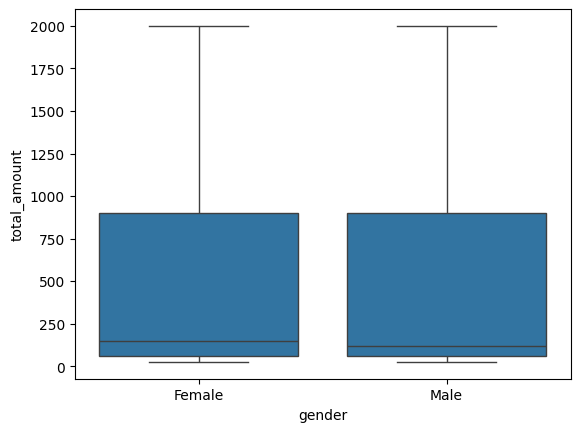

In [28]:
# Gender and total amount Box Plot
sns.boxplot(df, x='gender', y='total_amount')

- some outliers have in Clothing category 

<Axes: xlabel='product_category', ylabel='total_amount'>

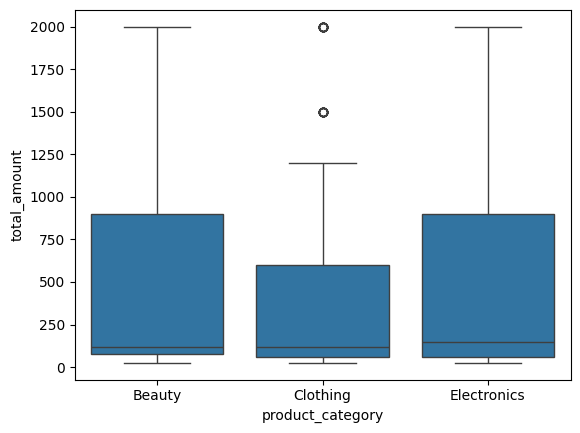

In [60]:
# Product category and total amount Box Plot
sns.boxplot(df, x='product_category', y='total_amount')

<Axes: xlabel='price_per_unit', ylabel='total_amount'>

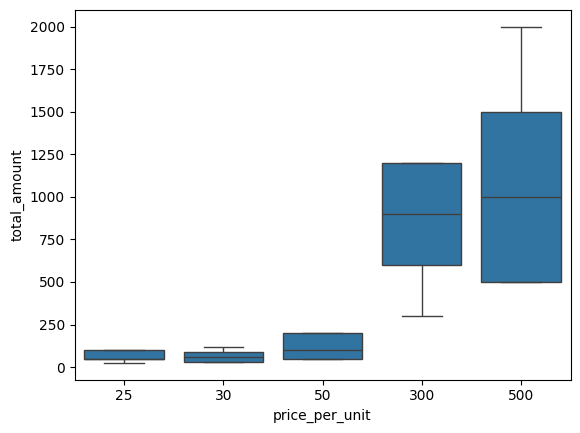

In [62]:
# Price per unit and total amount Box Plot
sns.boxplot(df, x='price_per_unit', y='total_amount')

<Axes: xlabel='quantity', ylabel='total_amount'>

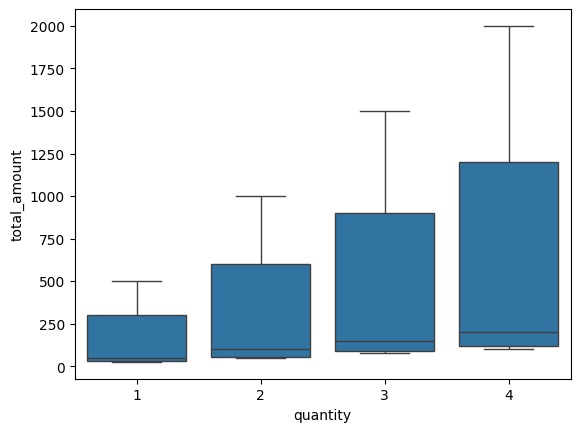

In [63]:
# Quantity and total amount Box Plot
sns.boxplot(df, x='quantity', y='total_amount')

# Multivariate Analysis

<Axes: xlabel='product_category', ylabel='total_amount'>

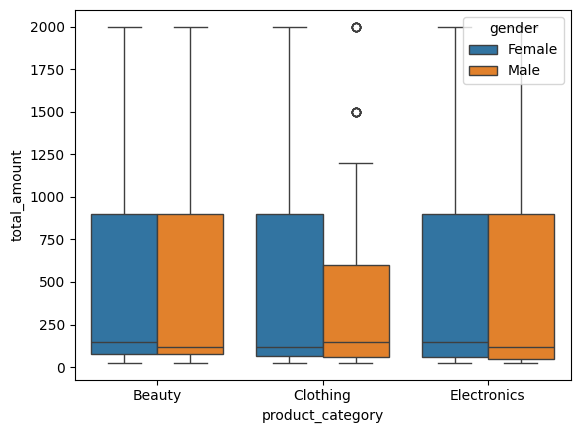

In [64]:
# Product category and total amount Box Plot with gender hue
sns.boxplot(df, x='product_category', y='total_amount', hue='gender')

<Axes: xlabel='price_per_unit', ylabel='total_amount'>

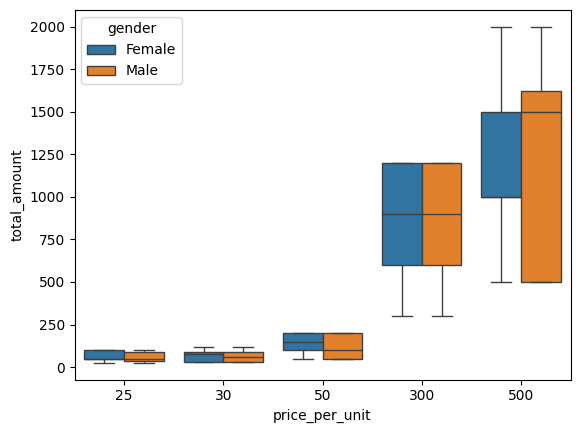

In [65]:
# Price per unit and total amount Box Plot with gender hue
sns.boxplot(df, x='price_per_unit', y='total_amount', hue='gender')

In [67]:
df.groupby(['price_per_unit','gender'])['total_amount'].describe()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13428\3199276764.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['price_per_unit','gender'])['total_amount'].describe()


count         mean         std    min     25%     50%  \
price_per_unit gender                                                          
25             Female  115.0    63.043478   28.165361   25.0    50.0    50.0   
               Male     95.0    61.052632   28.179655   25.0    37.5    50.0   
30             Female   92.0    74.347826   33.718432   30.0    30.0    75.0   
               Male     91.0    71.538462   34.283883   30.0    30.0    60.0   
50             Female   98.0   131.122449   58.992969   50.0   100.0   150.0   
               Male    113.0   122.566372   57.473266   50.0    50.0   100.0   
300            Female  106.0   786.792453  340.049148  300.0   600.0   900.0   
               Male     91.0   791.208791  333.216097  300.0   600.0   900.0   
500            Female   99.0  1237.373737  554.864547  500.0  1000.0  1000.0   
               Male    100.0  1250.000000  570.751764  500.0   500.0  1500.0   

                          75%     max  
price_per_unit gender                  
25             Female   100.0   100.0  
               Male      87.5   100.0  
30             Female    90.0   120.0  
               Male      90.0   120.0  
50             Female   200.0   200.0  
               Male     200.0   200.0  
300            Female  1200.0  1200.0  
               Male    1200.0  1200.0  
500            Female  1500.0  2000.0  
               Male    1625.0  2000.0

### LM PLOT
Analysis age and total amount with product category hue

<Figure size 1000x500 with 0 Axes>

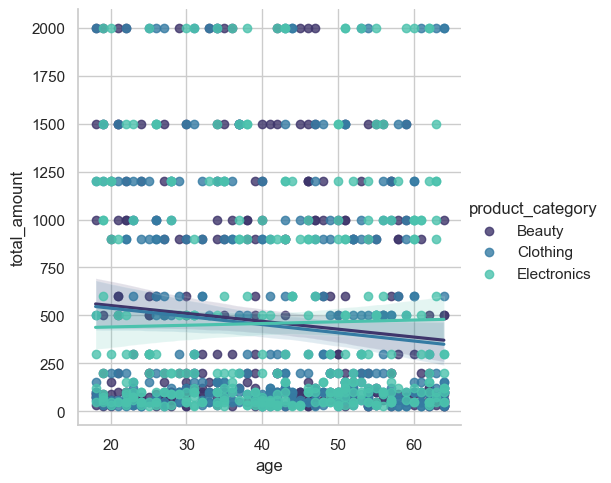

In [76]:
# Age and total amount LM plot
sns.set_theme()
sns.set_style('whitegrid')
sns.lmplot(data=df, x='age', y='total_amount',hue='product_category',palette='mako')
plt.show()

### Scatter plot 
Analysis age and total amount with product category hue

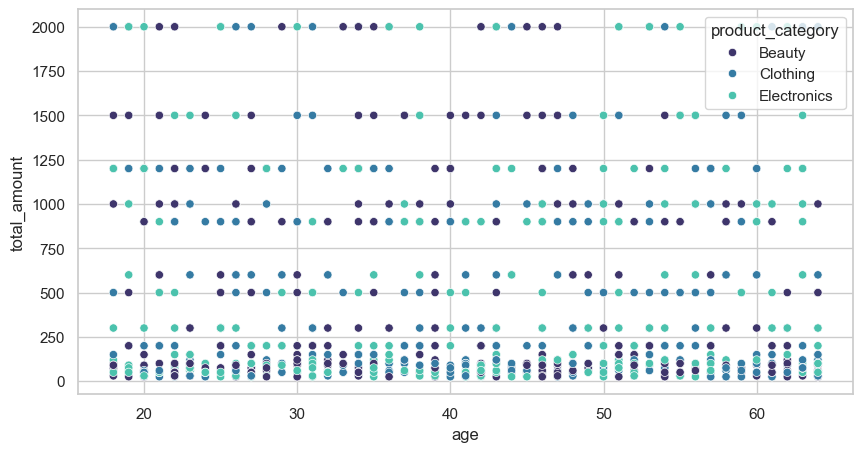

In [74]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=df,x='age',y='total_amount',hue='product_category',palette='mako')
plt.show()

### Line plot
Analysis age and total amount with product category hue

<function matplotlib.pyplot.show(close=None, block=None)>

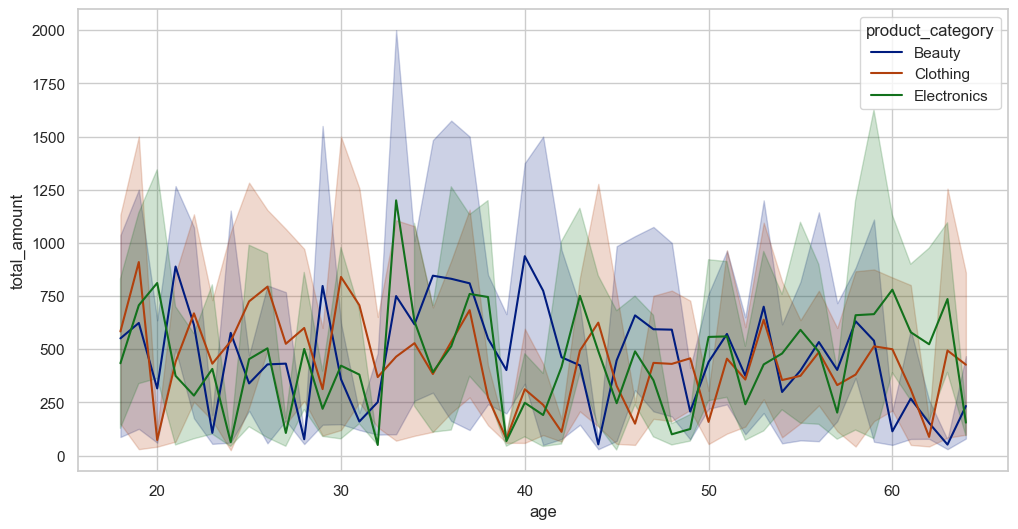

In [79]:
sns.set_theme()
sns.set_style('whitegrid')
plt.figure(figsize=(12,6))
sns.lineplot(data=df,x='age',y='total_amount',hue='product_category',palette='dark')
plt.show

### Violin Plot
Analysis quantity and price per unit

<Axes: xlabel='quantity', ylabel='price_per_unit'>

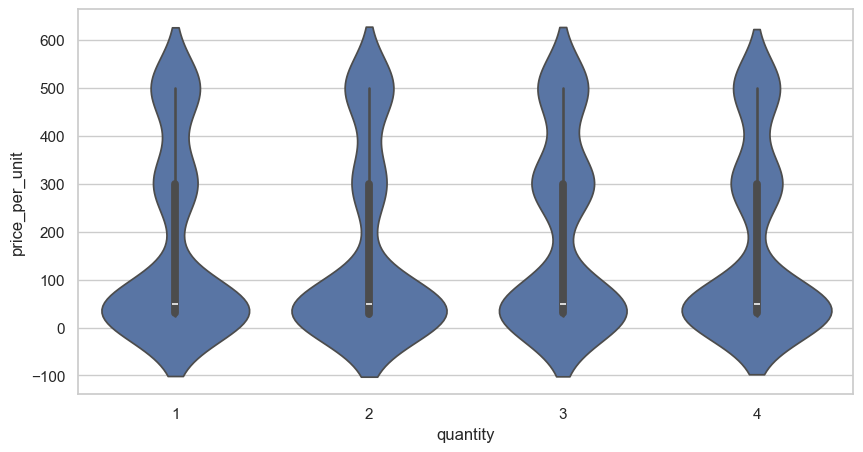

In [80]:
plt.figure(figsize=(10,5))
sns.violinplot(data=df,x='quantity',y='price_per_unit')